<a href="https://colab.research.google.com/github/Gufdoor/pai_list_02/blob/main/PAI_Lista_02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Question 01

## Otsu and Laplace

01. Manage imports

In [6]:
import numpy as np
import matplotlib.pyplot as plt

from skimage import io, img_as_float
from skimage.filters import threshold_otsu, laplace, gaussian
from google.colab import files

02. Setup images

In [7]:
# Upload the exact number of 3 image files
uploaded = files.upload()
filenames = list(uploaded.keys())[:3]

Saving industria.jpg to industria.jpg
Saving ultrassom.jpg to ultrassom.jpg
Saving lagoa.jpg to lagoa.jpg


03. Otsu and Laplace Algorithms

In [8]:
def segment_otsu(gray):
  t = threshold_otsu(gray)
  bin_img = gray > t
  return t, bin_img


def laplace_zero_crossing(gray, sigma=1.0):
  smoothed = gaussian(gray, sigma=sigma, preserve_range=True)
  lap = laplace(smoothed)
  zc = np.zeros_like(lap, dtype=bool)

  # Vertical
  zc[1:, :] |= (lap[1:, :] * lap[:-1, :]) < 0
  # Horizontal
  zc[:, 1:] |= (lap[:, 1:] * lap[:, :-1]) < 0
  # Diagonal
  zc[1:, 1:] |= (lap[1:, 1:] * lap[:-1, :-1]) < 0
  zc[1:, :-1] |= (lap[1:, :-1] * lap[:-1, 1:]) < 0

  return lap, zc

04. Plotting Methods

In [9]:
def plot_otsu_triptych(image, thresh, binary, main_title=""):
  fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(10, 3.5))
  ax = axes.ravel()

  ax[0] = plt.subplot(1, 3, 1)
  ax[0].imshow(image, cmap=plt.cm.gray)
  ax[0].set_title('Original Image')
  ax[0].axis('off')

  ax[1] = plt.subplot(1, 3, 2)
  ax[1].hist(image.ravel(), bins=256)
  ax[1].set_title('Histogram')
  ax[1].axvline(thresh, color='r')

  ax[2] = plt.subplot(1, 3, 3, sharex=ax[0], sharey=ax[0])
  ax[2].imshow(binary, cmap=plt.cm.gray)
  ax[2].set_title('Otsu')
  ax[2].axis('off')

  if main_title:
    fig.suptitle(main_title, y=1.05, fontsize=12)
  plt.tight_layout()
  plt.show()


def plot_laplace_triptych(original, lap_resp, edges, main_title=""):
  fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(10, 3.5))
  ax = axes.ravel()

  ax[0] = plt.subplot(1, 3, 1)
  ax[0].imshow(original, cmap=plt.cm.gray)
  ax[0].set_title('Original Image')
  ax[0].axis('off')

  ax[1] = plt.subplot(1, 3, 2, sharex=ax[0], sharey=ax[0])
  ax[1].imshow(lap_resp, cmap=plt.cm.gray)
  ax[1].set_title('LoG')
  ax[1].axis('off')

  ax[2] = plt.subplot(1, 3, 3, sharex=ax[0], sharey=ax[0])
  ax[2].imshow(edges, cmap=plt.cm.gray)
  ax[2].set_title('Borders (zero-crossing)')
  ax[2].axis('off')

  if main_title:
    fig.suptitle(main_title, y=1.05, fontsize=12)
  plt.tight_layout()
  plt.show()

05. Execute and Plot results

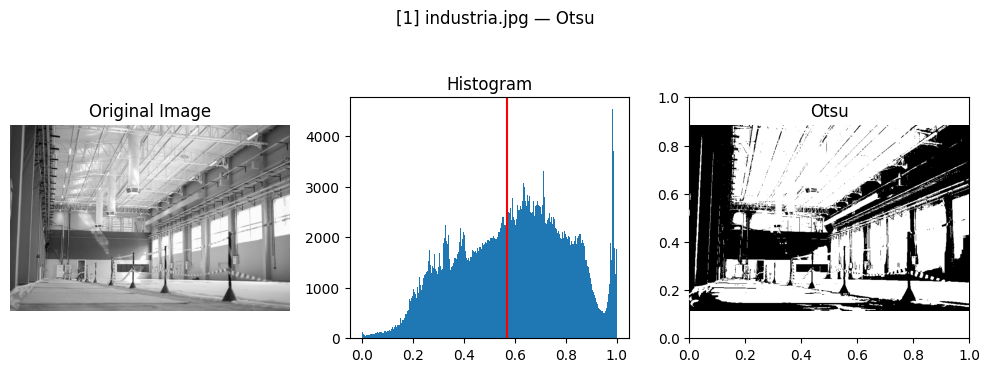

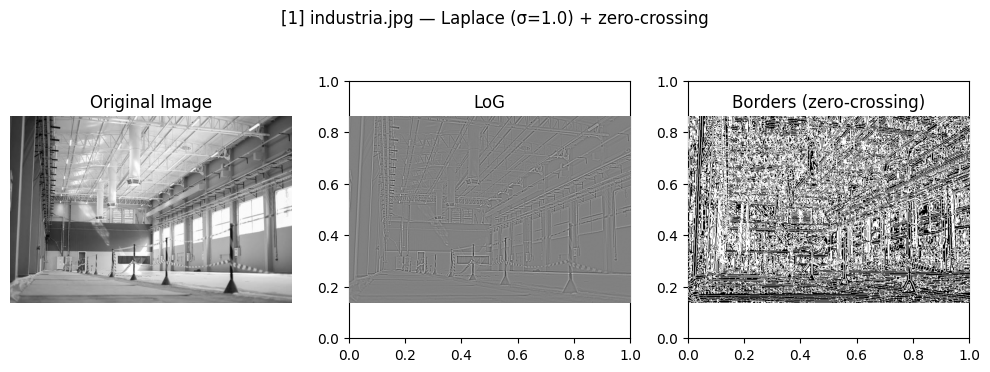

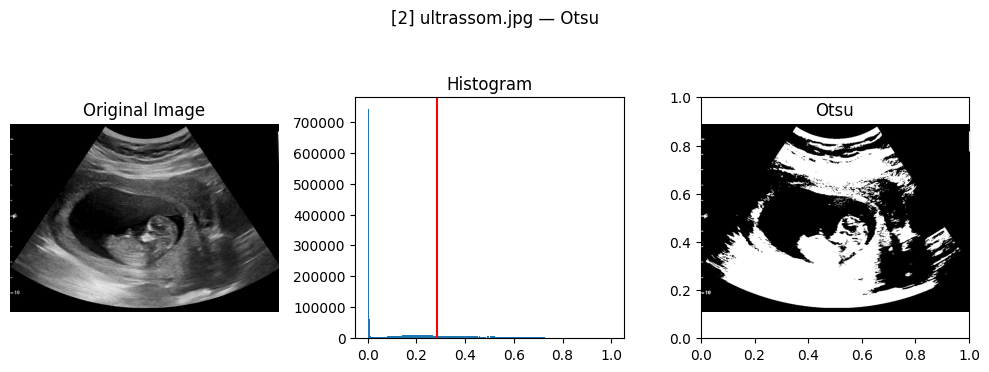

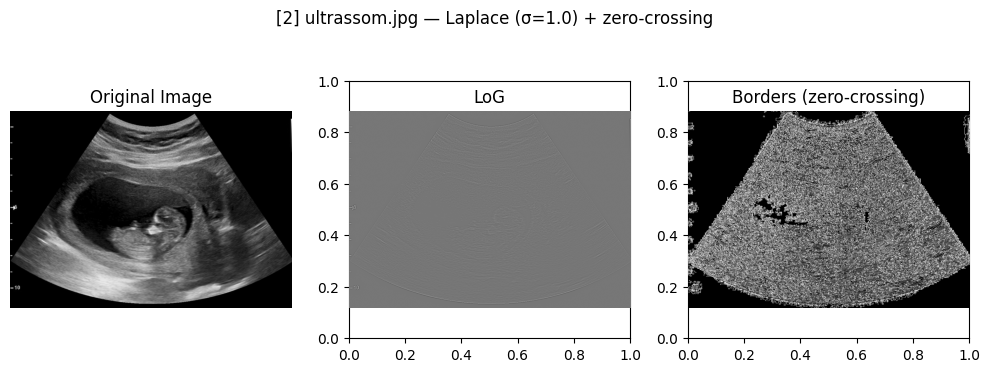

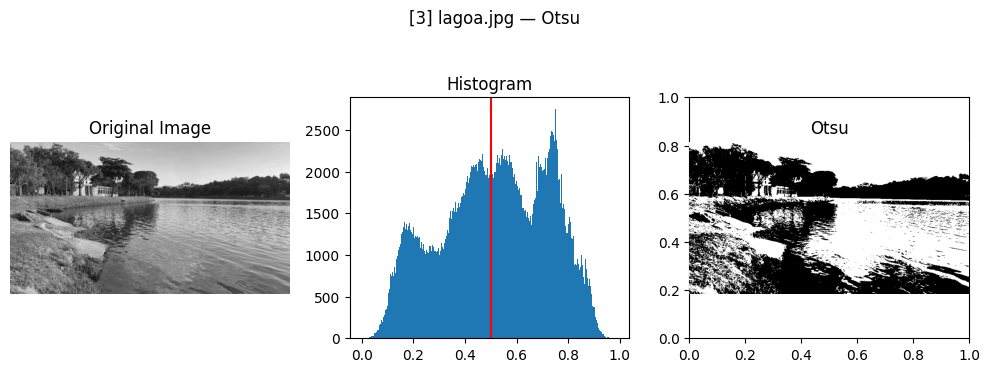

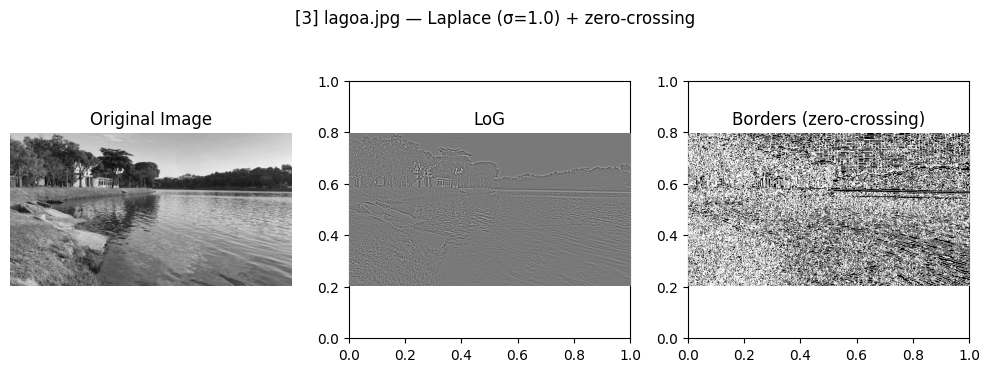

In [13]:
# Variables to hold the first segmented image and region/object
first_gray = None
first_binary = None
first_filename = None

for idx, fname in enumerate(filenames, start=1):
  gray = io.imread(fname, as_gray=True)
  gray = img_as_float(gray)

  t_otsu, bin_otsu = segment_otsu(gray)

  if idx == 1:
    first_gray = gray.copy()
    first_binary = bin_otsu.copy()
    first_filename = fname

  plot_otsu_triptych(gray, t_otsu, bin_otsu, main_title=f"[{idx}] {fname} — Otsu")

  lap_resp, edges = laplace_zero_crossing(gray, sigma=1.0)
  plot_laplace_triptych(gray, lap_resp, edges, main_title=f"[{idx}] {fname} — Laplace (σ=1.0) + zero-crossing")

# Question 02

## Skeletonize

01. Manage Imports

In [14]:
import numpy as np
import matplotlib.pyplot as plt

from skimage.measure import label, regionprops
from skimage.morphology import skeletonize

02. Select Image Region

In [15]:
lbl = label(first_binary, connectivity=2)
props = regionprops(lbl)

if not props:
    raise ValueError("No region found")

first_label = min([r.label for r in props])
obj_mask = (lbl == first_label)

03. Execute Skeletonize Algorithm

In [16]:
skeleton = skeletonize(obj_mask)

04. Plot Results

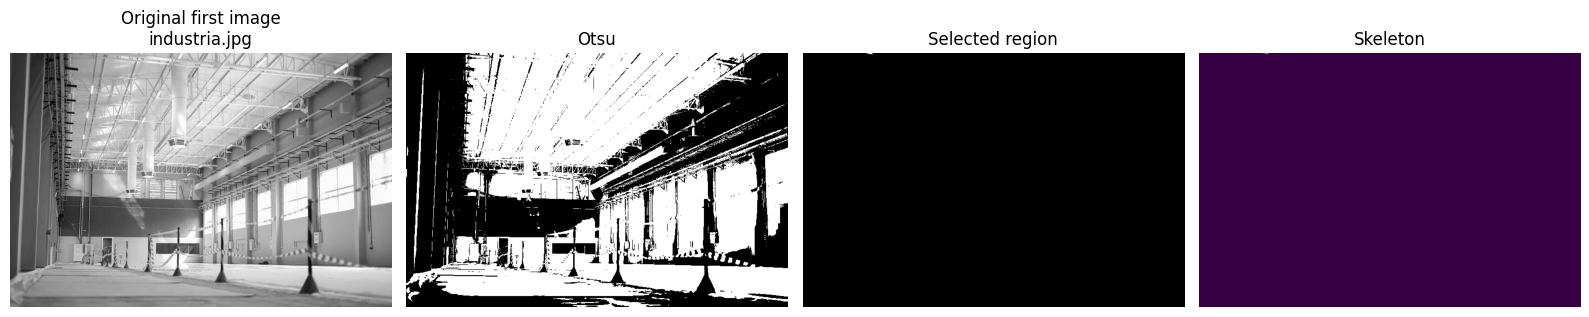

In [18]:
fig, axes = plt.subplots(1, 4, figsize=(16, 4.5))
ax = axes.ravel()

ax[0].imshow(first_gray, cmap='gray')
ax[0].set_title(f"Original first image\n{first_filename}")
ax[0].axis('off')

ax[1].imshow(first_binary, cmap='gray')
ax[1].set_title("Otsu")
ax[1].axis('off')

ax[2].imshow(obj_mask, cmap='gray')
ax[2].set_title("Selected region")
ax[2].axis('off')

ax[3].imshow(obj_mask, cmap='gray')
ax[3].imshow(skeleton, alpha=0.8)
ax[3].set_title("Skeleton")
ax[3].axis('off')

plt.tight_layout()
plt.show()

area_pixels = np.count_nonzero(obj_mask)
skeleton_pixels = np.count_nonzero(skeleton)